In [18]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32')/255.0

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential([
    Conv2D(32,(3,3), activation= 'relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')

])

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train, epochs=3, batch_size=64, validation_data=(x_test,y_test))

Epoch 1/3
938/938 [==============================] - 8s 9ms/step - loss: 0.1786 - accuracy: 0.9476 - val_loss: 0.0490 - val_accuracy: 0.9835
Epoch 2/3
938/938 [==============================] - 8s 9ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0358 - val_accuracy: 0.9884
Epoch 3/3
938/938 [==============================] - 8s 9ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0337 - val_accuracy: 0.9894


In [13]:
loss, accuracy = model.evaluate(x_test,y_test)
print("Accuracy: ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0337 - accuracy: 0.9894
Accuracy:  0.9894000291824341


In [23]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

313/313 [==============================] - 1s 2ms/step


In [24]:
cm = confusion_matrix(y_pred,y_true)

<Axes: >

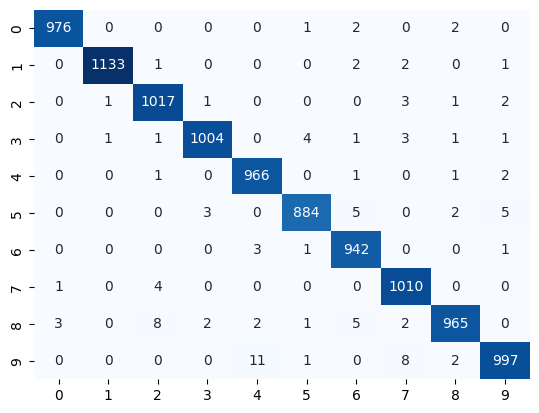

In [30]:
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)